#### Project Objective

Identify the relationship between the GDP and life expectancy of six countries.

#### Data

In [118]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter


df = pd.read_csv('all_data.csv')
#investigate column names first
print(df.columns)
print('\n')
#preview data
print(df.head())
print(df.tail())
print('\n')
#investigate the info and datatypes for each column
print(df.info()) # This suggest we have no -null data, country is a categorical data.
print('\n')
#Print out unique values
print(df['Country'].value_counts())
a=df['Country'].value_counts()

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')


  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
     Country  Year  Life expectancy at birth (years)           GDP
91  Zimbabwe  2011                              54.9  1.209845e+10
92  Zimbabwe  2012                              56.6  1.424249e+10
93  Zimbabwe  2013                              58.0  1.545177e+10
94  Zimbabwe  2014                              59.2  1.589105e+10
95  Zimbabwe  2015                              60.7  1.630467e+10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           

#### Exploratory Data Analysis

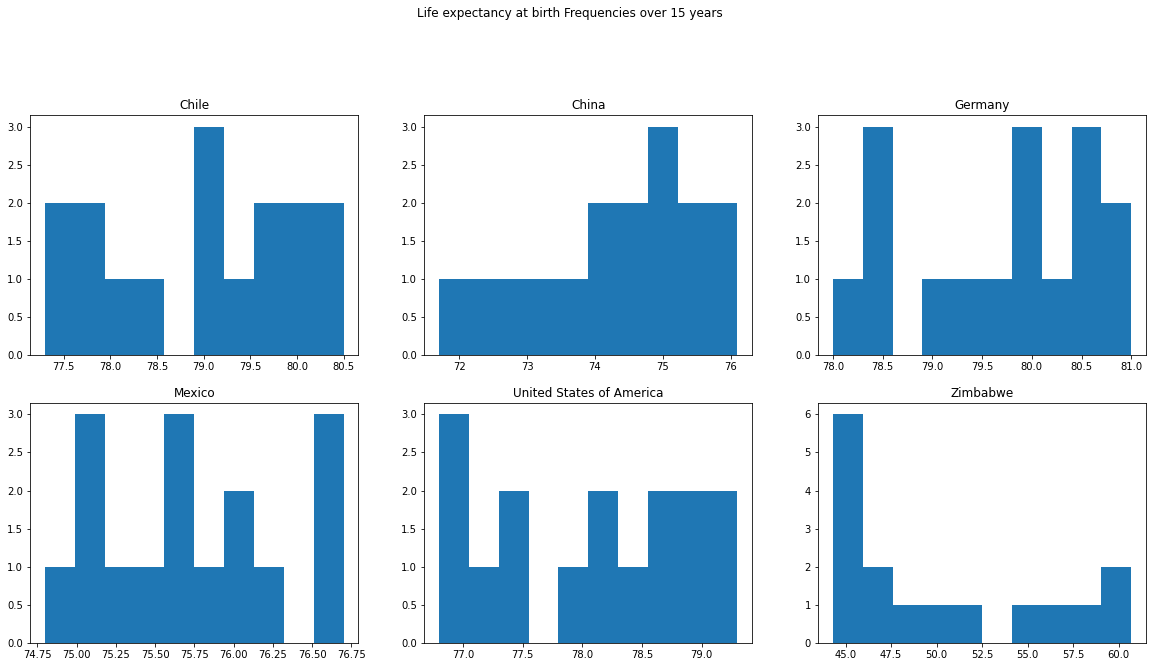

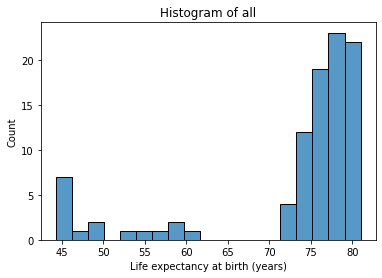

<Figure size 432x288 with 0 Axes>

In [131]:
#Show the distribution of Life Expectancy in each country
counter=1
unique_countries=df.Country.unique()
plt.figure(figsize=(20,15))

for country in unique_countries:
    #print(country)
    df_country=df[df['Country'] == country]
    #print(df_country)
    #df.groupby('Country').mean()
    plt.subplot(3,3,counter)
    plt.title(country)
    plt.hist(df_country["Life expectancy at birth (years)"])
    counter+=1
plt.suptitle('Life expectancy at birth Frequencies over 15 years')
plt.show()
plt.clf()
    
plt.title('Histogram of all')
sns.histplot(df["Life expectancy at birth (years)"])
plt.show()
plt.clf()

<AxesSubplot:xlabel='Year', ylabel='Life expectancy at birth (years)'>

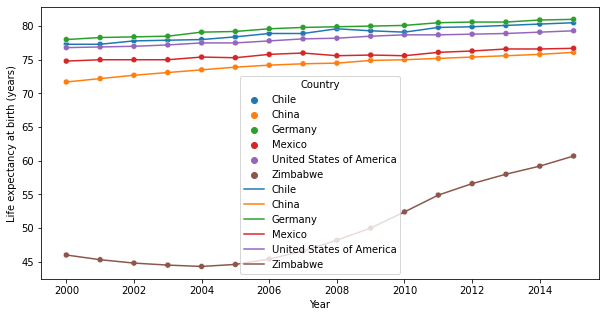

In [133]:
#Show the life expectancy at birth in a time series plot for each country
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.Year, y=df['Life expectancy at birth (years)'], hue=df.Country)
sns.lineplot(x=df.Year, y=df['Life expectancy at birth (years)'], hue=df.Country)



<Figure size 432x288 with 0 Axes>

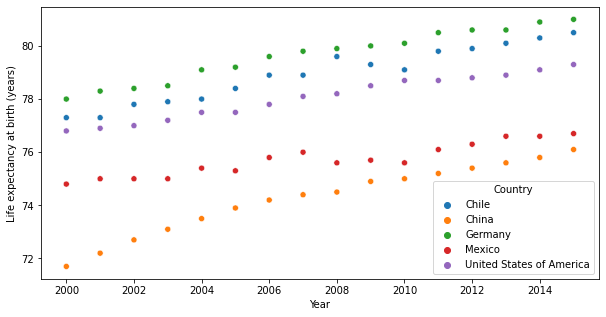

<Figure size 432x288 with 0 Axes>

<Figure size 720x360 with 0 Axes>

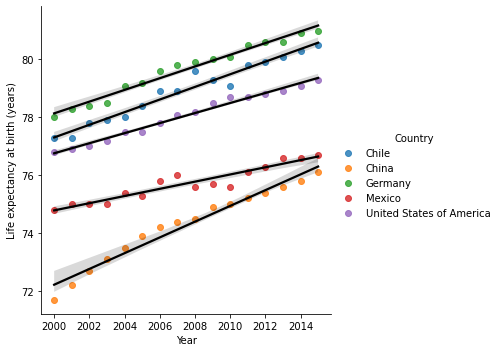

<Figure size 432x288 with 0 Axes>

In [132]:
#Second attempt
#This kinda looks out of whack bc of Zimbabwe skewing the rest of the data, lol, wish I could plot that on the secondary y-axis
plt.show()
plt.clf()
df_minus_Zimbabwe=df[df.Country != 'Zimbabwe']
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_minus_Zimbabwe.Year, y=df_minus_Zimbabwe['Life expectancy at birth (years)'], hue=df_minus_Zimbabwe.Country)
plt.show()
plt.clf()

plt.figure(figsize=(10,5)) #This does not work, need to figure out how to format it differently.
sns.lmplot(x='Year', y='Life expectancy at birth (years)', data = df_minus_Zimbabwe,hue='Country', line_kws={'color': 'black'})
plt.show()
plt.clf()

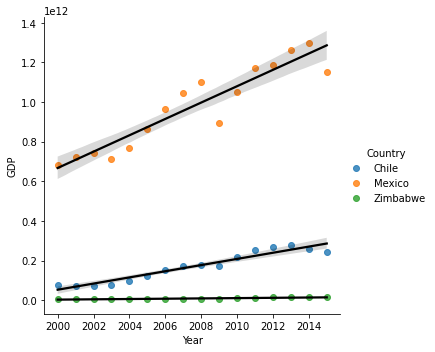

<Figure size 432x288 with 0 Axes>

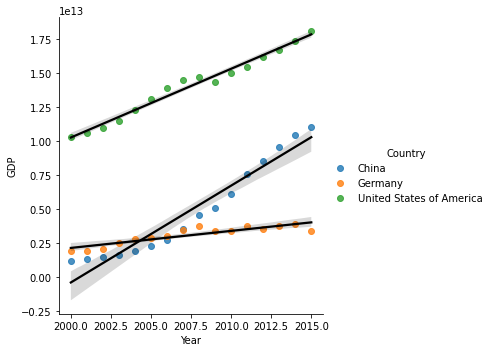

<Figure size 432x288 with 0 Axes>

In [121]:
#Show GDP change over time in a time series plot for each country
#Log scale on the y-axis is good to differentiate the countries at initial year , but it makes it harder to tell apart the changes over time for each country 
df_minus_USA_and_China_and_Germany=df[(df.Country != 'United States of America')&(df.Country != 'China')&(df.Country != 'Germany')]
df_USA_China_Germany=df[(df.Country == 'United States of America')|(df.Country == 'China')|(df.Country == 'Germany')]

sns.lmplot(x='Year', y='GDP', data = df_minus_USA_and_China_and_Germany,hue='Country', line_kws={'color': 'black'})
plt.show()
plt.clf()

sns.lmplot(x='Year', y='GDP', data = df_USA_China_Germany,hue='Country', line_kws={'color': 'black'})
plt.show()
plt.clf()




['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
['Chile' 'China' 'Germany' 'Mexico' 'United States of America']


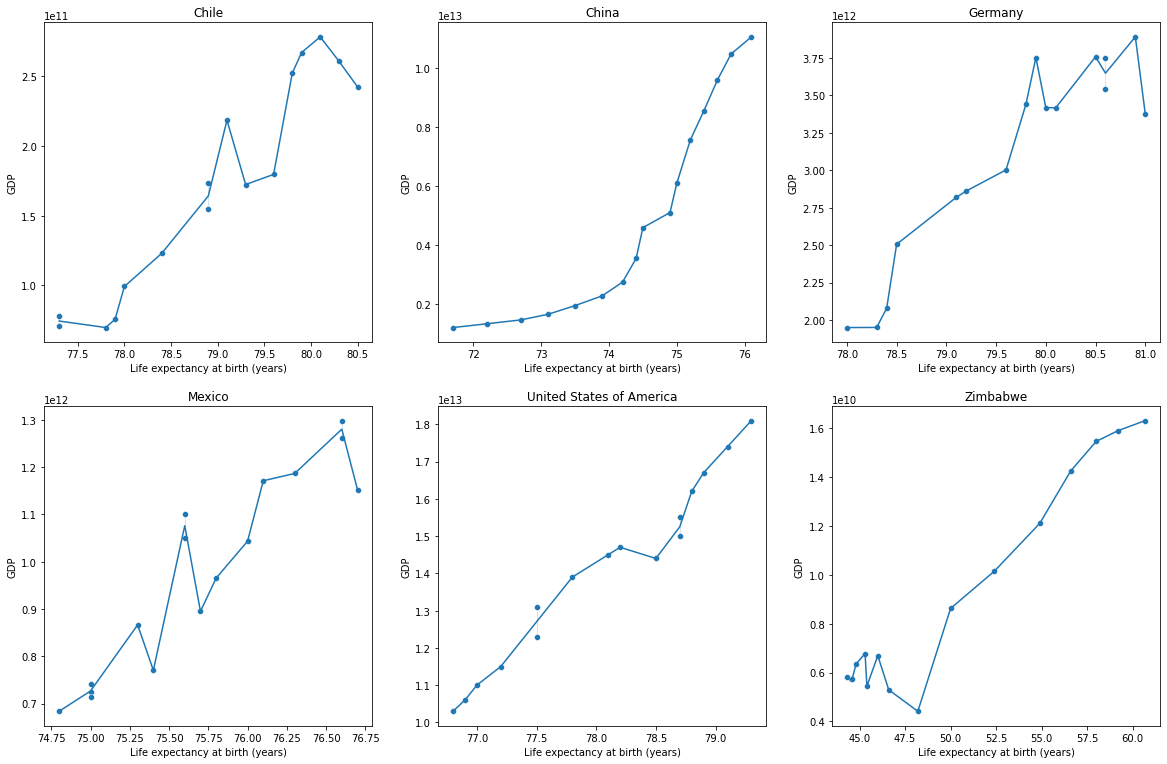

<Figure size 432x288 with 0 Axes>

In [122]:
#Plotting GDP vs life expectancy for each country
counter=1
plt.figure(figsize=(20,20))
print(unique_countries)
countries_minus_Zimbabwe=unique_countries[unique_countries != 'Zimbabwe']
print(countries_minus_Zimbabwe)
for country in unique_countries:
    ax= plt.subplot(3,3,counter)
    sns.lineplot(x='Life expectancy at birth (years)',y='GDP', data=df[df.Country == country])
    sns.scatterplot(x='Life expectancy at birth (years)',y='GDP', data=df[df.Country == country])
    plt.title(country)
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%2.2e'))
    counter+=1
plt.show()
plt.clf()

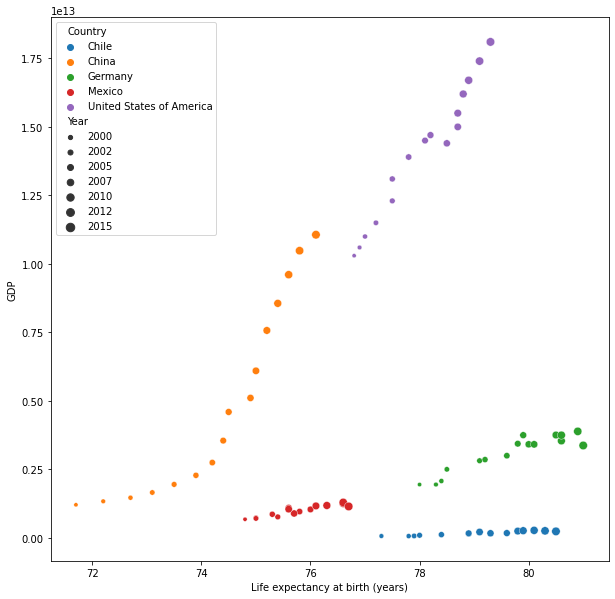

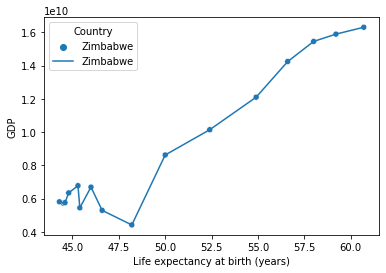

<Figure size 432x288 with 0 Axes>

In [123]:
#Plotting GDP vs life expectancy overall
plt.figure(figsize=(10,10))
df_life_above_65=df[df['Life expectancy at birth (years)']>65]
sns.scatterplot(x='Life expectancy at birth (years)',y='GDP', data=df_life_above_65, hue='Country',size='Year')

plt.show()
plt.clf()

plt.subplot()
sns.scatterplot(x='Life expectancy at birth (years)',y='GDP', data=df[df.Country == 'Zimbabwe'], hue='Country')
sns.lineplot(x='Life expectancy at birth (years)',y='GDP', data=df[df.Country == 'Zimbabwe'], hue='Country')
plt.show()
plt.clf()

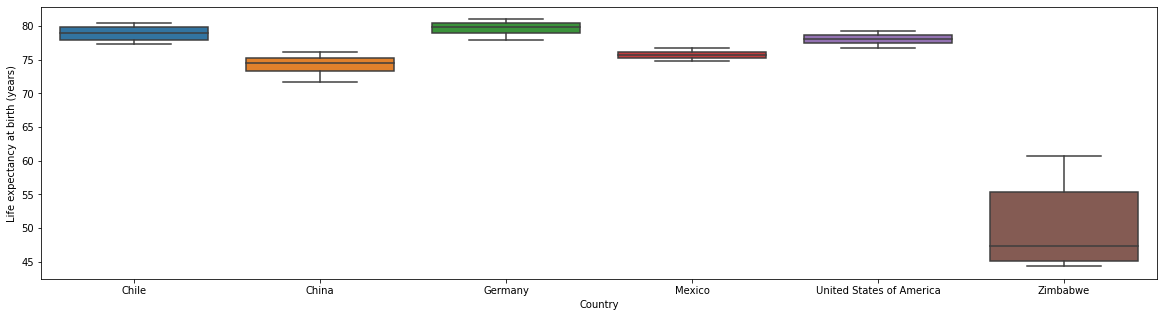

<Figure size 432x288 with 0 Axes>

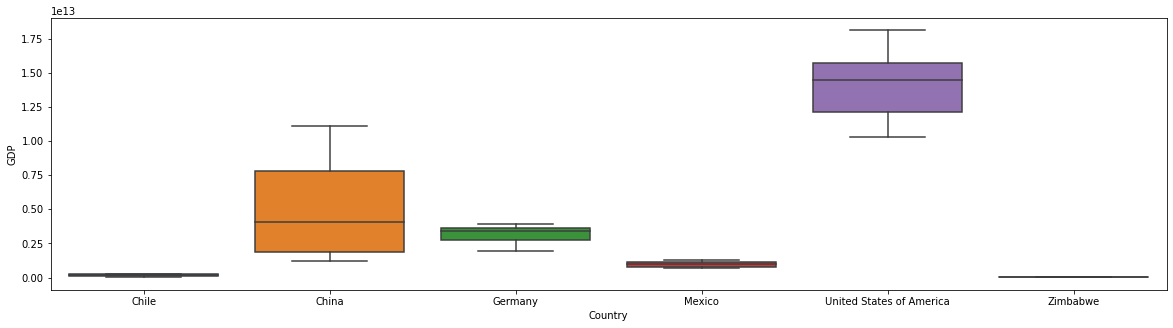

<Figure size 432x288 with 0 Axes>

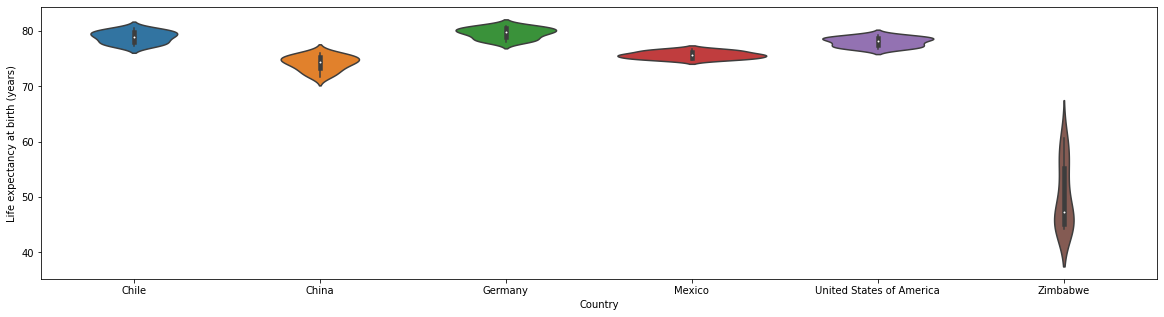

<Figure size 432x288 with 0 Axes>

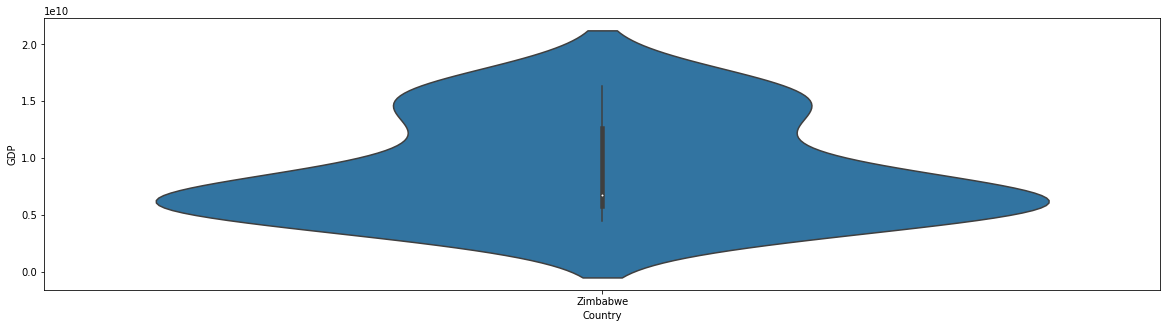

<Figure size 432x288 with 0 Axes>

In [124]:
#GDP and Life Expectancy boxplots for each country
plt.figure(figsize=(20,5))
sns.boxplot(x='Country',y='Life expectancy at birth (years)',data=df)
plt.show()
plt.clf()

plt.figure(figsize=(20,5))
sns.boxplot(x='Country',y='GDP',data=df)
plt.show()
plt.clf()

plt.figure(figsize=(20,5))
sns.violinplot(x='Country',y='Life expectancy at birth (years)',data=df)
plt.show()
plt.clf()

plt.figure(figsize=(20,5))
sns.violinplot(x='Country',y='GDP',data=df[df.Country=='Zimbabwe'])
plt.show()
plt.clf()